# 1. 데이터 보기.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

In [2]:
excel="C://Users/ajouu/Documents/python-project-Basic/data/Online Retail.xlsx" # C:// 라고 적어주기. 그리고 절대 경로를 변수에 넣어서 이용하기.
excel

'C://Users/ajouu/Documents/python-project-Basic/data/Online Retail.xlsx'

[Error Solve] 사실 .xlsx 파일이 안 불러와져서 구글링도 해보고, 네이버 카페에도 질문 글을 올렸었다.

* [문제점 1] import xlrd를 해주지 않았다. xlrd는 .xls, .xlsx 파일을 읽어주는 모듈이다.
* [문제점 2] fsspec module을 설치하지 않았다. fsspec은 파일 시스템 사양과 관련된 모듈이다.
* [문제점 3] 절대 경로를 이용하지 않았다. 반드시 C://이라고 고쳐주고, 나머지도 /라고 고쳐주기. 절대 경로를 변수에 담아서 이용하면 편리하다. csv 파일은 상대 경로로 불러와도 잘 되지만, xlsx는 절대 경로로 불러와야 잘 된다.

두 가지 문제점을 해결하고 나니, 제대로 데이터 프레임을 불러왔다.

In [3]:
df=pd.read_excel(excel, engine="openpyxl") # engine="openpyxl" 적어주기.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df_copy=df.copy()
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df_copy.shape # 행의 숫자가 엄청나게 큰 데이터 프레임이다.

(541909, 8)

## 칼럼 설명

* InvoiceNo : 주문 번호
* StockCode : 상품 코드
* Description : 상품 설명
* Quantity : 수량
* InvoiceDate : 주문 날자
* UnitPrice : 개별 가격
* CustomerID : 고객 번호
* Country : 국가

* [범주형 변수] : InvoiceNo, StockCode, Description, CustomerID, Country <빈도 계산 가능>
* [연속형 변수] : Quantity, InvoiceDAte, UnitPrice <통계적 수치 계산 가능>

In [6]:
df_copy.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df_copy.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df_copy.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df_copy.describe(include="object")

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [11]:
num_country=df_copy["Country"].nunique()
num_sales=df_copy["Description"].nunique()

In [12]:
print(f"총 데이터의 개수 : {df_copy.shape[0]*df_copy.shape[1]}개") # 약 400만개의 데이터를 가지고 있다.
print(f"총 결측치의 개수는 {df_copy.isnull().sum().sum()}개이고, 전체 데이터의 {(df_copy.isnull().sum().sum()/(df_copy.shape[0]*df_copy.shape[1]))*100:.2f}%가 결측치이다.")
print(f"전체 국가의 수는 {num_country}개이다.")
print(f"전체 판매 물건 수는 : {num_sales}개이다.")

총 데이터의 개수 : 4335272개
총 결측치의 개수는 136534개이고, 전체 데이터의 3.15%가 결측치이다.
전체 국가의 수는 38개이다.
전체 판매 물건 수는 : 4223개이다.


# 2. 질문하기.

### [강사님 질문]

* 어떤 고객이 가장 지출을 많이 했을까?
* 상품 금액의 분포?
* 어떤 물건의 주문량이 높을까?
* 날짜에 따라 판매 금액을 확인하자.
* 요일에 따라 주문량이 다를까?
* 국가 별 평균 주문 금액?
* 이 쇼핑몰 판매 물품의 주요 키워드는?

# 3. 데이터 정비하기.

## 3-1. 칼럼 명 변경하기.

* 칼럼 명이 대문자인 경우에는 굉장히 불편하다. 모두 소문자로 변경해주는 것이 편리하다.

In [13]:
df_copy.columns=df_copy.columns.str.lower() # 소문자로 바꾸기 전에 string으로 변환시켜주기.
df_copy.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [14]:
df_copy.dtypes

invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid            float64
country                object
dtype: object

In [15]:
df_copy["invoiceno"]=df_copy["invoiceno"].astype("int64") # int64로 변경 불가능하다.

ValueError: invalid literal for int() with base 10: 'C536379'

In [16]:
print(df_copy['invoiceno'].unique())
print(df_copy['stockcode'].unique())
print(df_copy['description'].unique())
print(df_copy['quantity'].unique()) # 음수 처리해야 한다.

[536365 536366 536367 ... 581585 581586 581587]
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -22
    -30    -70

In [17]:
print(df_copy['invoicedate'].unique()) # 분석하기 편리하도록 데이터 잘라야 한다.
print(df_copy['unitprice'].unique())
print(df_copy['customerid'].unique()) # int64로 변경해주기.
print(df_copy['country'].unique())

['2010-12-01T08:26:00.000000000' '2010-12-01T08:28:00.000000000'
 '2010-12-01T08:34:00.000000000' ... '2011-12-09T12:31:00.000000000'
 '2011-12-09T12:49:00.000000000' '2011-12-09T12:50:00.000000000']
[   2.55    3.39    2.75 ...  933.17 1714.17  224.69]
[17850. 13047. 12583. ... 13298. 14569. 12713.]
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


## 3-2. 결측치 처리하기.

In [18]:
df_copy.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [19]:
df_copy.loc[df_copy.isnull().any(axis=1)] # 결측치가 1개라도 있는 행을 모두 확인해보자.

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


customerid가 결측치인 경우에는 제대로 배송된 건지의 여부를 알 수 없기에, 그냥 모두 제거하고 데이터 분석하기.

In [20]:
df_copy=df_copy.dropna() # 데이터가 워낙 크니까, 결측치 제거하고 데이터 분석해도 크게 지장 없을 것 같다고 생각해서 없앴다.

In [21]:
df_copy.isnull().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

In [23]:
df_copy.shape # 행의 수가 많이 줄어들었다.

(406829, 8)

## 3-3. 칼럼 타입을 변경하기.

In [24]:
df_copy.dtypes

invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid            float64
country                object
dtype: object

In [25]:
df_copy["quantity"].unique() # 음수도 존재한다.

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

**내가 고려해야 되는 점**

* customerid : float64 > int64 로 변경하기. 아예 데이터 타입을 변경하기.
* quantity : 음수 > 양수인 것만 고려하기. 이 부분은 데이터 타입 변경 후, spent 라는 새로운 칼럼을 만들어서 다루기.

In [26]:
df_copy["customerid"]=df_copy["customerid"].astype("int64")
df_copy.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## 3-4. 새로운 칼럼 만들기.

* 총 소비 금액을 담은 spent 칼럼을 만들어주기.
* invoicedate를 쪼개서 칼럼으로 만들어주기. 나중에 분석할 때 편하게 이용하기 위함이다.

In [27]:
print(min(df_copy["quantity"]), max(df_copy["quantity"]))
print(min(df_copy["unitprice"]), max(df_copy["unitprice"]))

-80995 80995
0.0 38970.0


In [28]:
df_copy=df_copy.loc[df_copy["quantity"]>0] # 무조건 판매 수량이 양수인 행을 고르기.
df_copy.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [33]:
df_copy.shape

(397924, 9)

In [32]:
print(min(df_copy["quantity"]), max(df_copy["quantity"]))
print(min(df_copy["unitprice"]), max(df_copy["unitprice"]))

1 80995
0.0 8142.75


In [34]:
df_copy["spent"]=df_copy["quantity"]*df_copy["unitprice"]
df_copy.head() # 소비 금액 칼럼을 생성하기.

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [35]:
df_copy["year"]=df_copy["invoicedate"].dt.year
df_copy["month"]=df_copy["invoicedate"].dt.month
df_copy["day"]=df_copy["invoicedate"].dt.day
df_copy["weekday"]=df_copy["invoicedate"].dt.dayofweek # 0 ~ 6 (월요일 ~ 일요일)
df_copy["day_name"]=df_copy["invoicedate"].dt.day_name()
df_copy["hour"]=df_copy["invoicedate"].dt.hour
df_copy.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8


# 4. EDA & Visualization

## 4-1. 간단한 분석

In [36]:
df_copy.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday,8


주문 순위가 상위 10등 상품 알아보기.

In [37]:
df_copy["description"].value_counts().head(10) # value_counts() 정말 많이 사용하는 함수이다.

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: description, dtype: int64

In [38]:
plt.rc("font", family="Malgun Gothic") # 한글 폰트 깨짐 방지하기.
plt.rcParams["axes.unicode_minus"]=False # 마이너스 표기하기.

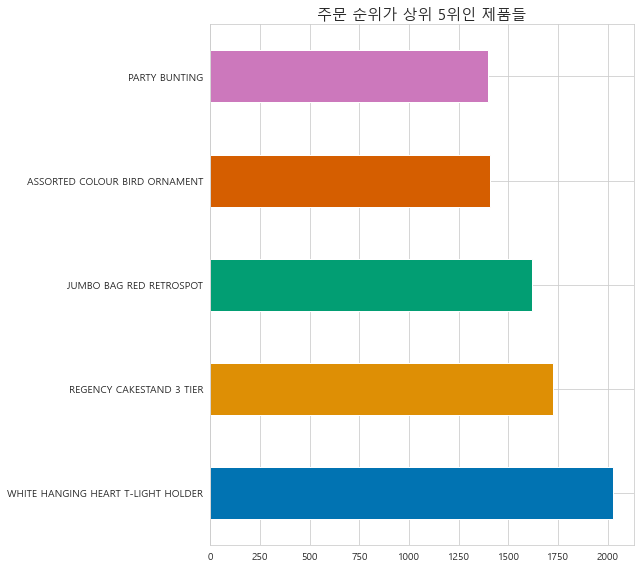

In [183]:
fig, ax=plt.subplots(1, 1, figsize=(9,8))
colors=sns.color_palette("colorblind", len(df_copy["description"].value_counts().head(5)))
_=df_copy["description"].value_counts().head(5).plot.barh(color=colors)
_=plt.title("주문 순위가 상위 5위인 제품들", fontsize=15)
fig.tight_layout() # 그림 짤리지 않게 하는 방법이다.
fig.savefig("./../images_Commerce/주문 순위 상위 5등.png", facecolor="#E6E9EE", dpi=200)

In [40]:
spent_cus=df_copy[["customerid", "spent"]].groupby(["customerid"])["spent"].sum()
spent_cus.sort_values(ascending=False)

customerid
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
17956        12.75
16454         6.90
14792         6.20
16738         3.75
13256         0.00
Name: spent, Length: 4339, dtype: float64

In [41]:
spent_cus=spent_cus[spent_cus>0]
spent_cus

customerid
12346    77183.60
12347     4310.00
12348     1797.24
12349     1757.55
12350      334.40
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2094.88
18287     1837.28
Name: spent, Length: 4338, dtype: float64

[tip] argmax와 argmin을 이용하여 가장 큰 값의 인덱스와 가장 작은 값의 인덱스를 구해보자.

In [42]:
print(f"가장 적게 구매한 고객 아이디는 {spent_cus.argmin()}이고, 금액은 {spent_cus.min()}이다.")
print(f"가장 많이 구매한 고객 아이디는 {spent_cus.argmax()}이고, 금액은 {spent_cus.max()}이다.")

가장 적게 구매한 고객 아이디는 3217이고, 금액은 3.75이다.
가장 많이 구매한 고객 아이디는 1689이고, 금액은 280206.02이다.


In [93]:
unit_min=np.min(df_copy["unitprice"])
unit_max=np.max(df_copy["unitprice"])
unit_mean=np.mean(df_copy["unitprice"])
unit_med=np.median(df_copy["unitprice"])

In [97]:
print(f"개별 품목의 최소 가격은 {unit_min} 파운드이고, 최대 가격은{unit_max} 파운드다.") # 최소, 최대
print(f"개별 품목의 평균은 {unit_mean} 파운드다.") # 평균
print(f"개별 품목의 중앙값은 {unit_med} 파운드다.") # 중앙값

개별 품목의 최소 가격은 0.0 파운드이고, 최대 가격은8142.75 파운드다.
개별 품목의 평균은 3.1161744805540756 파운드다.
개별 품목의 중앙값은 1.95 파운드다.


[boxplot] 최대값, 최소값, 중앙값을 이용해서 자료의 측정 값들의 분포를 쉽게 볼 수 있다.

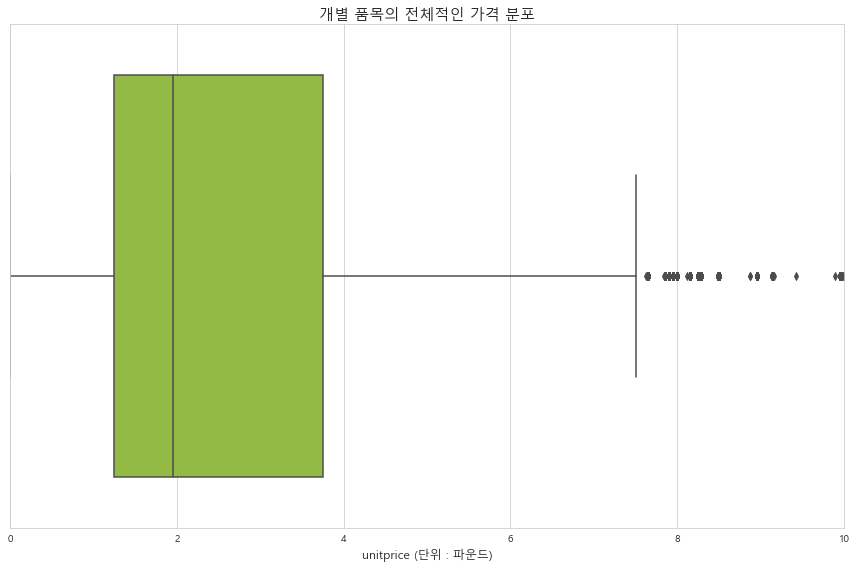

In [182]:
fig, ax=plt.subplots(1, 1, figsize=(12,8))
_=sns.boxplot(data=df_copy, x="unitprice", color="yellowgreen")
_=plt.xlim(0,10)
_=plt.xlabel("unitprice (단위 : 파운드)", fontsize=12)
_=plt.title("개별 품목의 전체적인 가격 분포", fontdict={"fontsize":15})
_=plt.tight_layout()
fig.savefig("./../images_Commerce/개별 품목 전체적인 가격 분포.png", facecolor="#E6E9EE", dpi=200)

[해석하는 방법] 0에서 7.xx 파운드까지 상품 금액이 분포하는데, 초록색 상자 안 정도의 금액이 많이 분포되어 있음을 의미한다. 점으로 표기되어 있는 부분은 이상점이다.

In [111]:
under_seven=df_copy["unitprice"].loc[df_copy["unitprice"]<=7].count()
under_seven

362316

In [112]:
total_unit=df_copy["unitprice"].shape[0]
total_unit

397924

In [113]:
(under_seven/total_unit)*100

91.05155758386023

In [115]:
print(f"7 파운드 이하의 상품 주문이 전체 물건 건수의 {(under_seven/total_unit)*100:.2f}%를 차지한다.")

7 파운드 이하의 상품 주문이 전체 물건 건수의 91.05%를 차지한다.


In [129]:
under_five=df_copy["unitprice"].loc[df_copy["unitprice"]<=5].count()
under_five

346757

In [131]:
print(f"5 파운드 이하의 상품 주문이 전체 물건 건수의 {(under_five/total_unit)*100:.2f}%를 차지한다.")

5 파운드 이하의 상품 주문이 전체 물건 건수의 87.14%를 차지한다.


이 상점에서는 상대적으로 저렴한 물건을 팔아서 이익을 내는 구조를 가지고 있다. (7 파운드 이하의 상품과 5 파운드 이하 상품의 비율이 크게 차이가 나지 않기 때문이다.)

In [135]:
total_sum=df_copy["spent"].sum()
total_sum

8911407.904

In [136]:
sum_under_seven=df_copy["spent"].loc[df_copy["unitprice"]<=7].sum()
sum_under_seven

7599120.314000001

In [137]:
(sum_under_seven/total_sum)*100

85.27407112168032

In [138]:
print(f"7 파운드 이하의 상품은 전체 수익의 {(sum_under_seven/total_sum)*100:.2f}%를 차지한다.")

7 파운드 이하의 상품은 전체 수익의 85.27%를 차지한다.


In [139]:
sum_under_five=df_copy["spent"].loc[df_copy["unitprice"]<=5].sum()
sum_under_five

7100318.504000001

In [140]:
print(f"5 파운드 이하의 상품은 전체 수익의 {(sum_under_five/total_sum)*100:.2f}%를 차지한다.")

5 파운드 이하의 상품은 전체 수익의 79.68%를 차지한다.


## 4-2. 날짜에 따른 판매 금액 (시계열)

In [142]:
df_copy.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,day_name,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,Wednesday,8


In [152]:
df1=df_copy[["invoicedate", "spent"]].groupby(["invoicedate"])["spent"].sum().reset_index()
df1

,invoicedate,spent
0,2010-12-01 08:26:00,139.12
1,2010-12-01 08:28:00,22.20
2,2010-12-01 08:34:00,348.78
3,2010-12-01 08:35:00,17.85
4,2010-12-01 08:45:00,855.86
...,...,...
17281,2011-12-09 12:23:00,124.60
17282,2011-12-09 12:25:00,140.64
17283,2011-12-09 12:31:00,329.05
17284,2011-12-09 12:49:00,339.20


* [setting] sns style로 스타일 지정해주기.

In [184]:
sns.set_style("whitegrid")
plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 방지하기.
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨짐 방지하기.

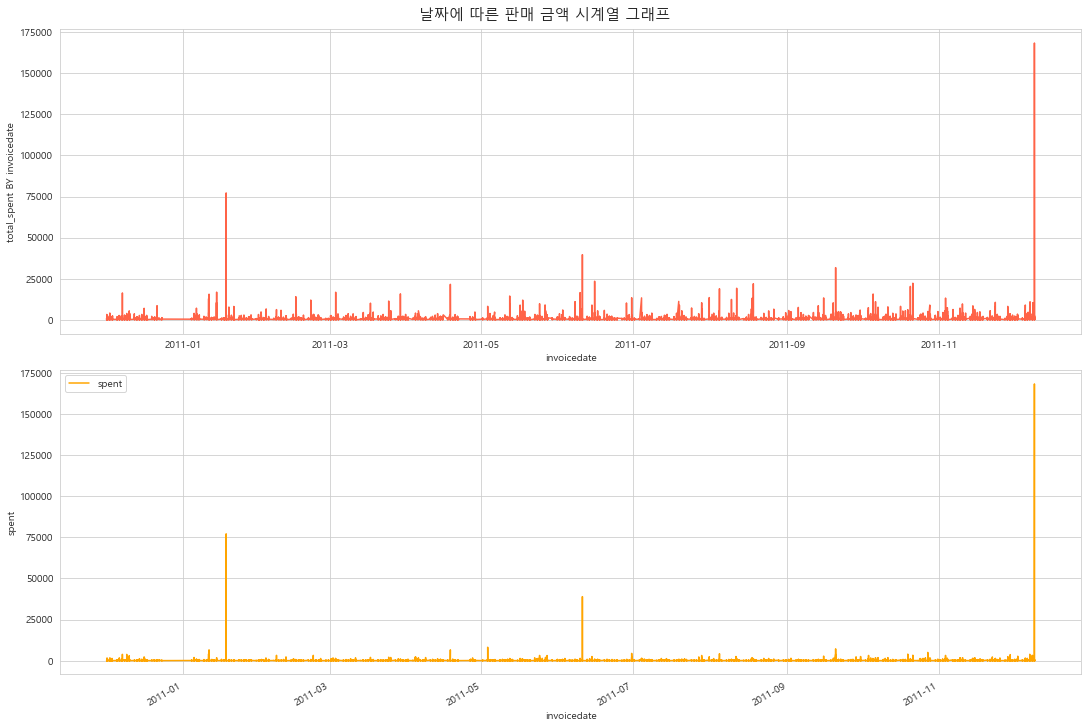

In [180]:
fig, ax=plt.subplots(2, 1, figsize=(15,10), constrained_layout=True)

_=sns.lineplot(data=df1, x="invoicedate", y="spent", ax=ax[0], color="tomato")
_=df_copy.plot(x="invoicedate", y="spent", color="orange", ax=ax[1])
_=ax[0].set_ylabel("total_spent BY invoicedate")
_=ax[1].set_ylabel("spent")
_=plt.suptitle("날짜에 따른 판매 금액 시계열 그래프", fontsize=15)
fig.savefig("./../images_Commerce/날짜에 따른 판매 금액 시계열 그래프1.png", facecolor="#E6E9EE", dpi=200)

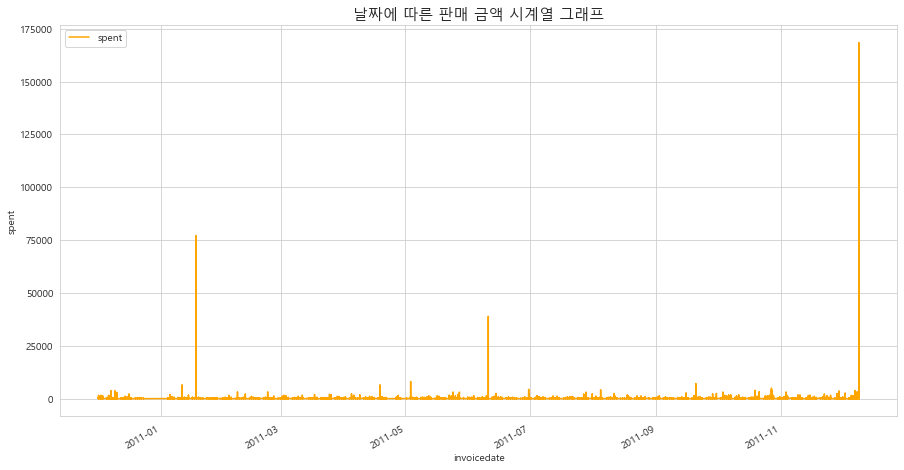

In [181]:
fig, ax=plt.subplots(1, 1, figsize=(15,8))

_=df_copy.plot(x="invoicedate", y="spent", ax=ax, color="orange")
_=plt.title("날짜에 따른 판매 금액 시계열 그래프", fontsize=15)
_=ax.set_ylabel("spent")
fig.savefig("./../images_Commerce/날짜에 따른 판매 금액 시계열 그래프2.png", facecolor="#E6E9EE", dpi=200)

## 4-3. 요일 별 / 시간 별 주문 량